In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import alphalens
%matplotlib inline

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
DATA_DIR = 'D:/Data/index/'

In [3]:
fname = '%s/881001.WI.xlsx'%(DATA_DIR)
df = pd.read_excel(fname)

In [4]:
files = [f for f in os.listdir(DATA_DIR) if f.startswith('CI')]

In [5]:
dic = {}
for f in files:
    fname = '%s/%s'%(DATA_DIR, f)
    temp = pd.read_excel(fname)
    dic[f.rstrip('.xlsx')] = temp['close']
idf = pd.DataFrame(dic)

In [6]:
idf = idf.dropna()

In [13]:
idf.tail()

,CI005001.WI,CI005002.WI,CI005003.WI,CI005004.WI,CI005005.WI,CI005006.WI,CI005007.WI,CI005008.WI,CI005009.WI,CI005010.WI,...,CI005020.WI,CI005021.WI,CI005022.WI,CI005023.WI,CI005024.WI,CI005025.WI,CI005026.WI,CI005027.WI,CI005028.WI,CI005029.WI
2018-03-08,2483.2910,1970.1034,5216.0306,2760.8431,1832.2562,4911.5052,4161.3517,6580.7373,3762.9345,5684.3930,...,4912.8895,7408.1262,8760.7048,7679.8163,2119.8360,5969.2808,4866.5712,4904.3607,3357.1792,5092.3927
2018-03-09,2488.8331,1962.3808,5227.3347,2766.8073,1804.5210,4963.8833,4185.4984,6615.4303,3790.5108,5779.2588,...,4987.5336,7418.0319,8853.4132,7681.2499,2139.3927,6149.2577,5017.2598,5071.8307,3452.6682,5130.1291
2018-03-12,2524.7361,1979.6055,5357.1917,2779.4440,1822.5898,5061.1745,4213.5147,6748.3238,3841.3045,5854.1861,...,5023.0184,7389.0315,8926.4308,7581.7779,2154.4987,6268.0002,5106.9734,5175.0538,3520.2065,5146.0233
2018-03-13,2515.5652,1973.0397,5336.3586,2759.2045,1812.4389,5038.3987,4181.7388,6741.5571,3809.6311,5819.6998,...,5033.7615,7394.3901,8746.2422,7559.3807,2143.4861,6196.2707,5057.7192,5165.9391,3497.5894,5112.0052
2018-03-14,2515.7088,1980.9450,5353.4200,2743.1448,1833.3380,5013.5396,4144.4957,6841.5360,3784.0329,5756.4381,...,4983.7431,7325.3831,8682.4051,7549.4468,2120.5394,6108.5709,4998.5337,5028.4881,3454.8016,5028.5500


In [7]:
ret_df = idf.resample('M').last().pct_change()

In [8]:
rret_df = ret_df.subtract(df['close'].resample('M').last().pct_change(), axis='index')

In [9]:
rret_df = rret_df.dropna()

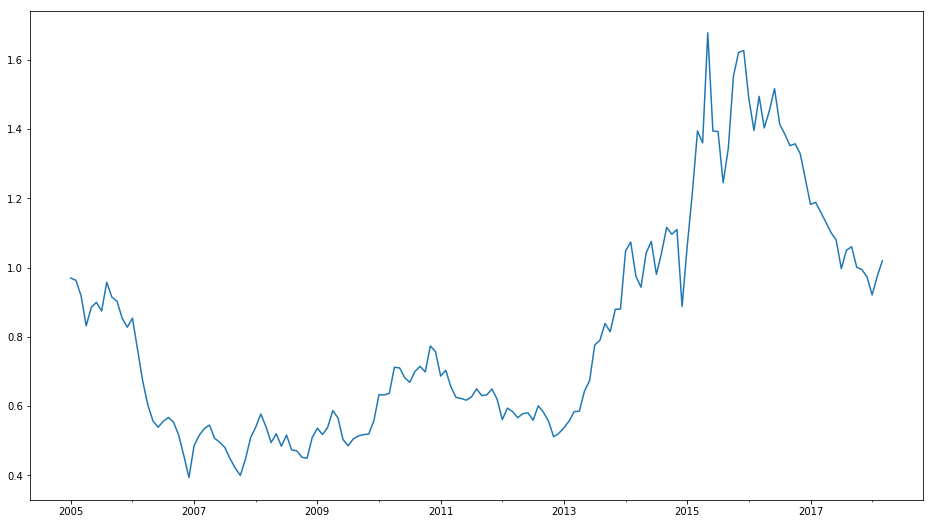

In [10]:
plt.figure(figsize=(16, 9))
(1+rret_df['CI005027.WI']).cumprod().plot()

In [11]:
def transition_matrix(labels, n):
    M = [[0]*n for _ in range(n)]
    for (i,j) in zip(labels, labels[1:]):
        M[i][j] += 1
    for row in M:
        m = sum(row)
        if m > 0:
            row[:] = [x*1./m for x in row]
    Mdf = pd.DataFrame(M, index=range(n), columns=range(n))
    return Mdf

In [12]:
rret_df.shape

(159, 29)

# 对收益率百分位进行聚类

In [14]:
affprop = sklearn.cluster.AffinityPropagation()
affprop.fit(rret_df.rank(pct=True, axis=1))

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [18]:
affprop.labels_

array([12,  0, 14, 14, 11, 10,  8,  5,  0, 15,  8,  0,  3, 14,  0,  0,  5,
        6, 11, 15, 15, 12,  8,  8,  5,  1,  1,  1,  7,  3,  9,  9,  9,  9,
       13, 13, 13,  5, 16, 14, 13, 10, 13,  6,  8, 15,  1, 11,  2,  5,  2,
        3,  9, 12,  9, 13,  3,  2,  5,  3, 13, 13,  3,  4,  5, 16,  7,  5,
        4,  9, 13,  9,  6, 13, 12, 14, 15,  7,  5, 10,  8, 10,  4,  8,  9,
       13, 10,  7, 16, 10, 10, 11,  0,  6,  9,  9, 11, 13, 11,  3, 11, 10,
       11,  2, 11,  6, 13, 16, 11,  4, 12, 16, 13, 11,  9, 13, 13,  6, 12,
        9, 13, 11, 13,  6, 13, 14, 15, 12, 10, 13, 13, 16, 14, 14, 13, 14,
        3, 13, 14,  9, 12,  7,  6, 14,  9,  1, 16, 14,  8,  7,  9,  4, 13,
       16,  8, 16, 14, 11, 13], dtype=int64)

# 计算转移概率矩阵

In [19]:
# tran = transition_matrix(kmeans.labels_, K)

In [20]:
tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)

# 计算下期预期收益

In [22]:
label = affprop.labels_[-1]

In [23]:
prob = tran.loc[label].values

In [24]:
pred = affprop.cluster_centers_.T.dot(prob)

In [25]:
pd.Series(pred, index=rret_df.columns).sort_values(ascending=False)

CI005025.WI    0.647989
CI005016.WI    0.623563
CI005015.WI    0.617816
CI005010.WI    0.600575
CI005021.WI    0.596264
CI005018.WI    0.589080
CI005009.WI    0.583333
CI005019.WI    0.583333
CI005017.WI    0.573276
CI005013.WI    0.567529
CI005024.WI    0.567529
CI005014.WI    0.547414
CI005023.WI    0.544540
CI005004.WI    0.528736
CI005029.WI    0.524425
CI005026.WI    0.510057
CI005001.WI    0.510057
CI005011.WI    0.510057
CI005020.WI    0.507184
CI005027.WI    0.497126
CI005008.WI    0.484195
CI005006.WI    0.482759
CI005022.WI    0.478448
CI005012.WI    0.435345
CI005005.WI    0.416667
CI005028.WI    0.412356
CI005007.WI    0.412356
CI005003.WI    0.334770
CI005002.WI    0.313218
dtype: float64

# 滚动计算历史预测

In [80]:
W = 110
pred_df = pd.DataFrame(index=rret_df.index, columns=rret_df.columns)
for i, date in enumerate(rret_df.index):
    past_return = rret_df[rret_df.index <= date][-W:]
    if past_return.shape[0] >= W:
        past_return = past_return.rank(pct=True, axis=1)
        affprop = sklearn.cluster.AffinityPropagation()
        affprop.fit(past_return)
        label = affprop.labels_[-1]
        tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)
        prob = tran.loc[label].values
        pred = affprop.cluster_centers_.T.dot(prob)
        pred_df.loc[date] = pred

In [81]:
pred_df.tail()

,CI005001.WI,CI005002.WI,CI005003.WI,CI005004.WI,CI005005.WI,CI005006.WI,CI005007.WI,CI005008.WI,CI005009.WI,CI005010.WI,...,CI005020.WI,CI005021.WI,CI005022.WI,CI005023.WI,CI005024.WI,CI005025.WI,CI005026.WI,CI005027.WI,CI005028.WI,CI005029.WI
2017-11-30,0.62931,0.642241,0.439655,0.418103,0.478448,0.581897,0.599138,0.655172,0.37931,0.612069,...,0.293103,0.491379,0.646552,0.706897,0.435345,0.698276,0.413793,0.452586,0.323276,0.491379
2017-12-31,0.735632,0.574713,0.316092,0.568966,0.454023,0.425287,0.41954,0.37931,0.41954,0.396552,...,0.293103,0.701149,0.672414,0.672414,0.591954,0.666667,0.477011,0.482759,0.477011,0.448276
2018-01-31,0.658621,0.634483,0.52069,0.544828,0.548276,0.493103,0.358621,0.513793,0.424138,0.5,...,0.451724,0.765517,0.693103,0.62069,0.617241,0.572414,0.386207,0.4,0.317241,0.503448
2018-02-28,0.467433,0.478927,0.536398,0.478927,0.402299,0.524904,0.43295,0.544061,0.551724,0.662835,...,0.421456,0.455939,0.563218,0.563218,0.43295,0.678161,0.478927,0.62069,0.386973,0.59387
2018-03-31,0.587931,0.391379,0.343103,0.544828,0.465517,0.434483,0.358621,0.415517,0.543103,0.532759,...,0.508621,0.675862,0.532759,0.584483,0.631034,0.617241,0.47069,0.434483,0.387931,0.517241


In [82]:
pred_df.iloc[-1].sort_values(ascending=False)

CI005016.WI    0.686207
CI005021.WI    0.675862
CI005024.WI    0.631034
CI005025.WI    0.617241
CI005019.WI         0.6
CI005015.WI    0.594828
CI005001.WI    0.587931
CI005023.WI    0.584483
CI005013.WI    0.575862
CI005018.WI    0.565517
CI005014.WI    0.562069
CI005004.WI    0.544828
CI005009.WI    0.543103
CI005017.WI    0.536207
CI005022.WI    0.532759
CI005010.WI    0.532759
CI005029.WI    0.517241
CI005011.WI    0.512069
CI005020.WI    0.508621
CI005026.WI     0.47069
CI005005.WI    0.465517
CI005027.WI    0.434483
CI005006.WI    0.434483
CI005008.WI    0.415517
CI005002.WI    0.391379
CI005012.WI    0.389655
CI005028.WI    0.387931
CI005007.WI    0.358621
CI005003.WI    0.343103
Name: 2018-03-31 00:00:00, dtype: object

# 验证因子

In [83]:
pred_df = pred_df.dropna()
pricing = idf[idf.index >= pred_df.index[0]].resample('M').last()

In [84]:
factor_df = pred_df.stack()
factor_df.index = factor_df.index.set_names(['date', 'asset'])

In [85]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df, pricing, quantiles=5, periods=(1,2,3))

Dropped 6.0% entries from factor data (6.0% after in forward returns computation and 0.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [86]:
factor_data.head()

1         2         3    factor  \
date       asset                                                 
2014-02-28 CI005001.WI -0.064921 -0.085915 -0.070079  0.548276   
           CI005002.WI -0.014509 -0.018216  0.008809  0.575862   
           CI005003.WI -0.039110 -0.054453 -0.025208  0.693103   
           CI005004.WI -0.030401 -0.040498 -0.034543  0.386207   
           CI005005.WI -0.011200 -0.042430 -0.017466  0.375862   

                        factor_quantile  
date       asset                         
2014-02-28 CI005001.WI                4  
           CI005002.WI                4  
           CI005003.WI                5  
           CI005004.WI                1  
           CI005005.WI                1

In [87]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

In [88]:
mean_return_by_q.head()

,1,2,3
factor_quantile,,,
1,-0.003904,-0.011036,-0.008488
2,-0.006100,-0.006097,-0.003337
3,0.002670,0.000082,0.002945
4,0.000484,0.003308,-0.000041
5,0.007376,0.014088,0.009580


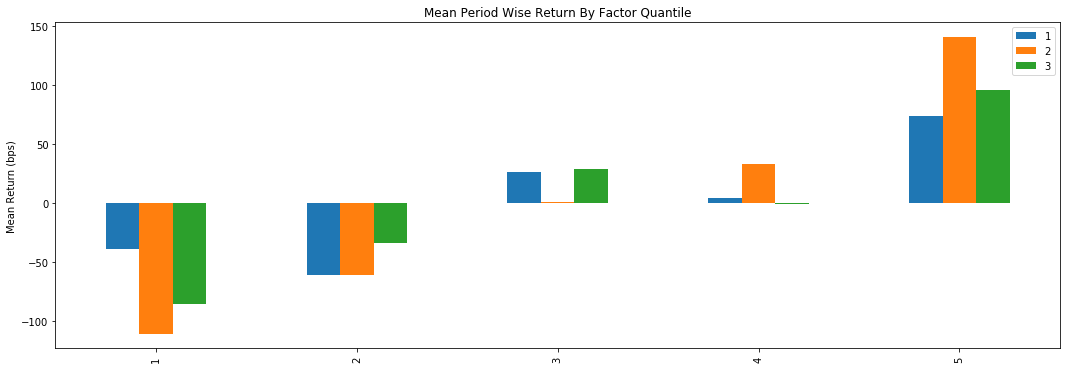

In [89]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

In [57]:
mean_return_by_q_daily, std_err = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)

In [58]:
mean_return_by_q_daily.head()

1         2         3
factor_quantile date                                    
1               2008-12-31  0.014839  0.027754  0.076688
                2009-01-31  0.016975  0.044122  0.062149
                2009-02-28 -0.032875 -0.063018 -0.078196
                2009-03-31 -0.026117 -0.021160  0.029908
                2009-04-30 -0.004010 -0.007625  0.010501

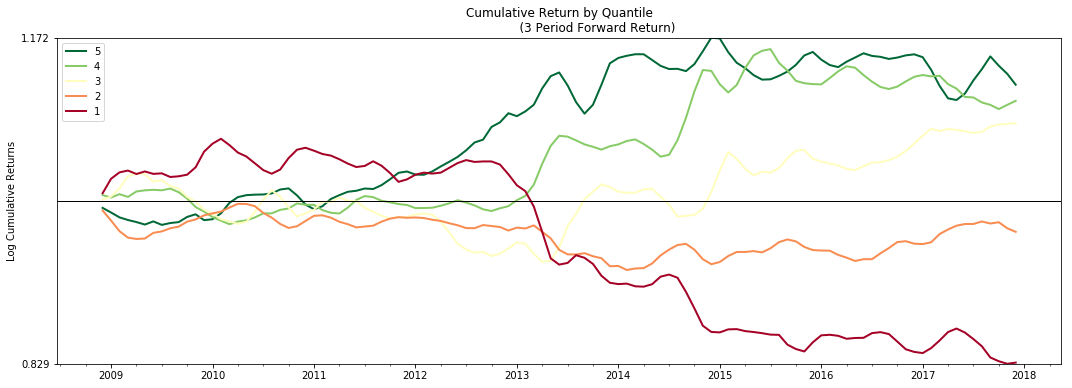

In [59]:
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q_daily, period=3)

In [40]:
ls_factor_returns = alphalens.performance.factor_returns(factor_data)

In [41]:
ls_factor_returns.head()

,1,2,3
date,,,
2009-12-31,-0.008603,-0.011873,0.003942
2010-01-31,0.001124,0.019097,0.032375
2010-02-28,0.017649,0.033506,0.046978
2010-03-31,0.013151,0.027120,0.010707
2010-04-30,0.017594,0.014659,0.015656


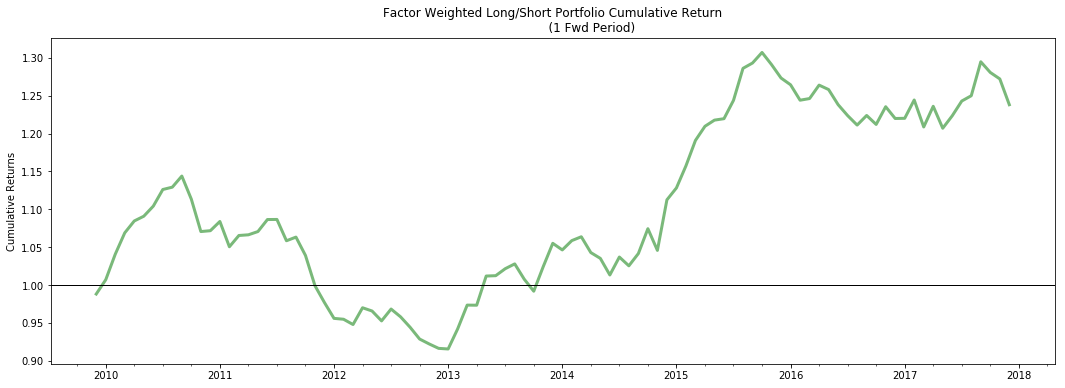

In [43]:
alphalens.plotting.plot_cumulative_returns(ls_factor_returns[2]);

In [44]:
alpha_beta = alphalens.performance.factor_alpha_beta(factor_data)

In [45]:
alpha_beta

,1,2,3
Ann. alpha,0.214591,0.269086,0.310133
beta,-0.000109,0.026488,0.062688


Returns Analysis


,1,2,3
Ann. alpha,0.215,0.269,0.310
beta,0.000,0.026,0.063
Mean Period Wise Return Top Quantile (bps),11.187,17.321,19.233
Mean Period Wise Return Bottom Quantile (bps),-14.421,-12.431,-18.807
Mean Period Wise Spread (bps),27.543,32.584,40.038


C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


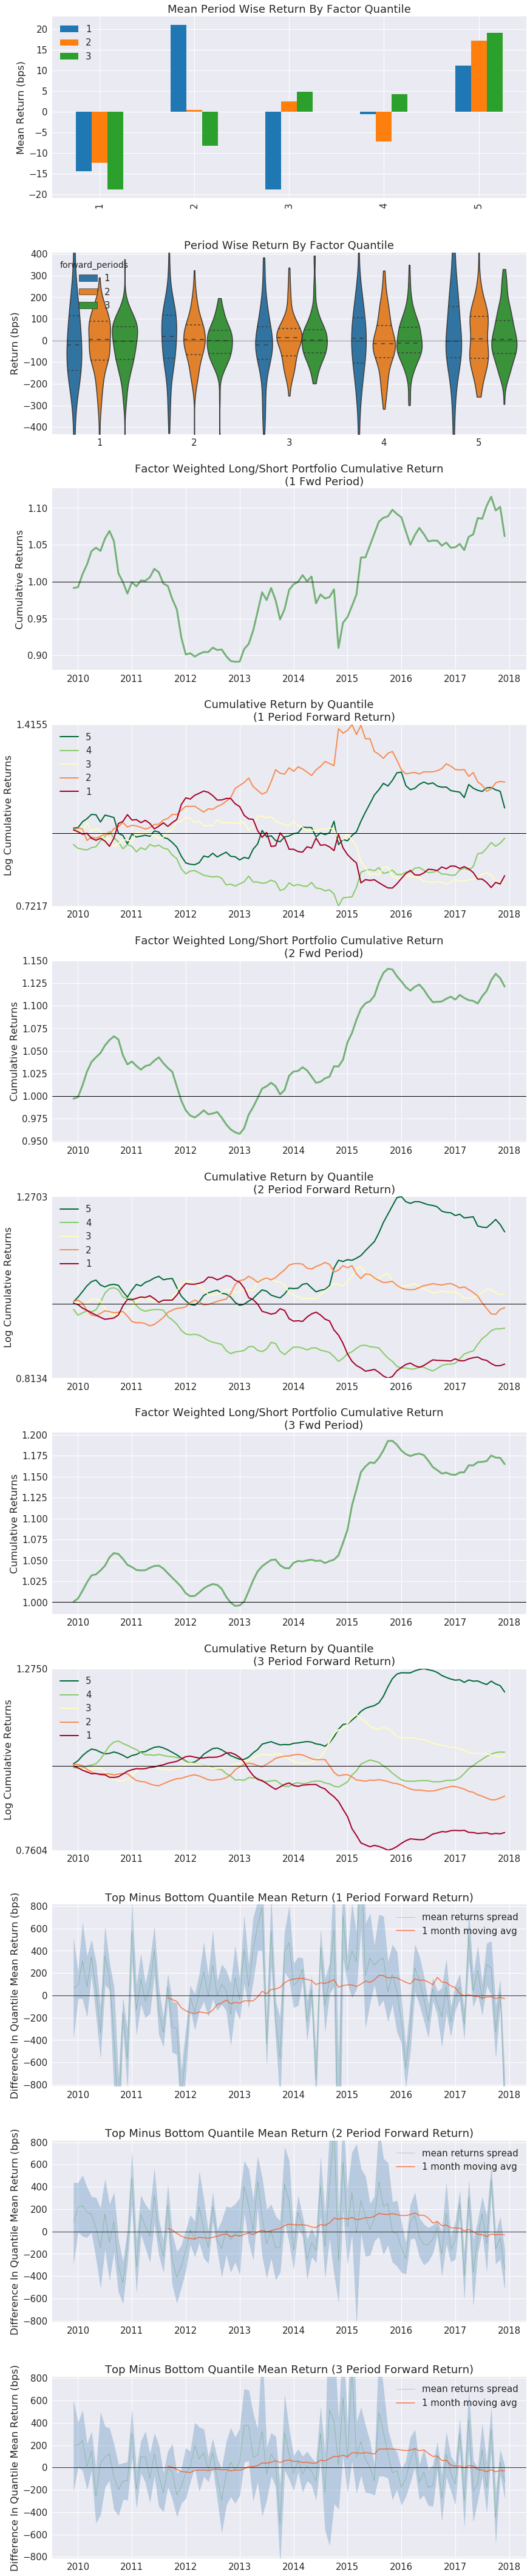

In [46]:
alphalens.tears.create_returns_tear_sheet(factor_data)